In [247]:
#FIGURE 1 SCRIPT

In [248]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import statsmodels.api as sm
from scipy.stats import ks_2samp
import scripy.stats

ModuleNotFoundError: No module named 'scripy'

In [249]:
def create_stacked_column_chart(selections, female_groups, male_groups, column_spacing, legend_spacing, colors):
    """
    Generates a 100% stacked column chart.
    
    :param selections: numpy array of proportions or counts of selections.
    :param female_groups: list of labels for female groups.
    :param male_groups: list of labels for male groups.
    :param column_spacing: float, space between columns.
    :param legend_spacing: float, space around the legend.
    :param colors: list of colors for each male group.
    """
    # Calculating the percentage for the stacked chart
    total_selections = selections.sum(axis=1)
    percentage_selections = selections / total_selections[:, np.newaxis] *100

    # Creating the figure and axes
    fig, ax = plt.subplots()

    # Stacking bars
    bottom_values = np.zeros(len(female_groups))
    for i, male_group in enumerate(male_groups):
        bars = ax.bar(female_groups, percentage_selections[:, i], column_spacing, label=male_group, color=colors[i], bottom=bottom_values)
        bottom_values += percentage_selections[:, i]

        # Adding text inside the bars
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # Only display if there's enough space
                ax.annotate(f'{height:.1f}',
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            xytext=(0, 3),  # Offset for text
                            textcoords="offset points",
                            ha='center', va='bottom')

    # Customizing the chart
    #ax.set_xlabel('Female Groups')
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)  # Remove top spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    ax.set_title('Female Mate Choice Preference is Influenced by Microbiome Profile')

    # Adjusting legend position and spacing
    ax.legend(loc='center left', bbox_to_anchor=(1, legend_spacing))

    # Removing internal grid or dotted lines
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Show the plot
    plt.tight_layout()
    plt.show()

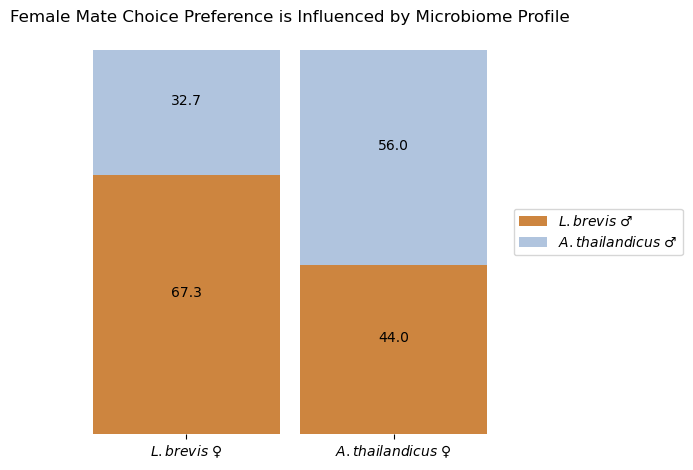

In [250]:
# Example usage
female_groups = ['$\it{L. brevis}$ ♀', '$\it{A. thailandicus}$ ♀']
male_groups = ['$\it{L. brevis}$ ♂', '$\it{A. thailandicus}$ ♂']
selections = np.array([[.673, .327], [.44, .56]])
colors = ['peru', 'lightsteelblue']  # Example colors, modify as needed
create_stacked_column_chart(selections, female_groups, male_groups, 0.9, 0.5, colors)

In [251]:
#FIGURE 2 SCRIPT
#
#
#
#
#
#
#
#
#
#
#
#
#
#

In [252]:
import matplotlib.pyplot as plt
import numpy as np

def create_final_chart_without_xaxis_values(selections, female_groups, male_groups, time_periods, column_spacing, inner_column_spacing, legend_spacing, colors, legend_title):
    """
    Final version of the 100% stacked column chart without numerical values on the x-axis.
    
    :param selections: 4D numpy array of proportions or counts of selections, with dimensions [treatment, time, male_group].
    :param female_groups: list of labels for female groups (treatments).
    :param male_groups: list of labels for male groups.
    :param time_periods: list of time period labels.
    :param column_spacing: float, space between groups of columns.
    :param inner_column_spacing: float, space between columns within a group.
    :param legend_spacing: float, space around the legend.
    :param colors: list of colors for each male group.
    :param legend_title: string, title for the legend.
    """
    # Calculating the percentage for the stacked chart
    total_selections = selections.sum(axis=2)
    percentage_selections = selections / total_selections[:, :, np.newaxis] * 100

    # Creating the figure and axes
    fig, ax = plt.subplots()

    # Number of groups (treatments) and bars per group (time periods)
    n_groups = len(female_groups)
    n_bars = len(time_periods)

    # Creating indices for the bars
    group_indices = np.arange(n_groups) * (n_bars + 1) * column_spacing

    # Stacking bars for each time period with added spacing
    for i, time_period in enumerate(time_periods):
        time_period_indices = group_indices + i * (inner_column_spacing + 0.1)  # Additional space for each column
        bottom_values = np.zeros(n_groups)
        for j, male_group in enumerate(male_groups):
            bars = ax.bar(time_period_indices, percentage_selections[:, i, j], inner_column_spacing, label=male_group if i == 0 else "", color=colors[j], bottom=bottom_values)
            bottom_values += percentage_selections[:, i, j]

            # Adding text inside the bars
            for bar in bars:
                height = bar.get_height()
                if height > 0:  # Only display if there's enough space
                    ax.annotate(f'{height:.1f}',
                                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                                xytext=(0, 3),  # Offset for text
                                textcoords="offset points",
                                ha='center', va='bottom')

    # Customizing the chart
    #ax.set_xlabel('Female Groups (Treatments)')
    ax.xaxis.set_tick_params(labelsize=0)  # Hide x-axis numerical values
    ax.xaxis.set_tick_params(length=0)  # Hide x-axis ticks
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title('Female Mate Choice Homophily is Elevated in Choosy Females')
    
    # Adjusting legend position, spacing, and customization
    #legend = ax.legend(loc='center left', bbox_to_anchor=(1, legend_spacing), title=legend_title)
    #legend = legend.get_frame().set_edgecolor('none')  # Remove the box outline
    #legend = legend.set_title(legend_title)  # Set the legend title


    # Adjusting legend position and spacing
    ax.legend(loc='center left', bbox_to_anchor=(1, legend_spacing))

    # Swapping group and time labels
    for i, group_index in enumerate(group_indices):
        ax.text(group_index + inner_column_spacing / 2, -15, female_groups[i], ha='center')  # Group label at bottom
        for j, time_period in enumerate(time_periods):
            ax.text(group_index + j * (inner_column_spacing + 0.1), -5, time_period, ha='center')  # Time labels above

    # Removing internal grid or dotted lines
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Show the plot
    plt.tight_layout()
    plt.show()


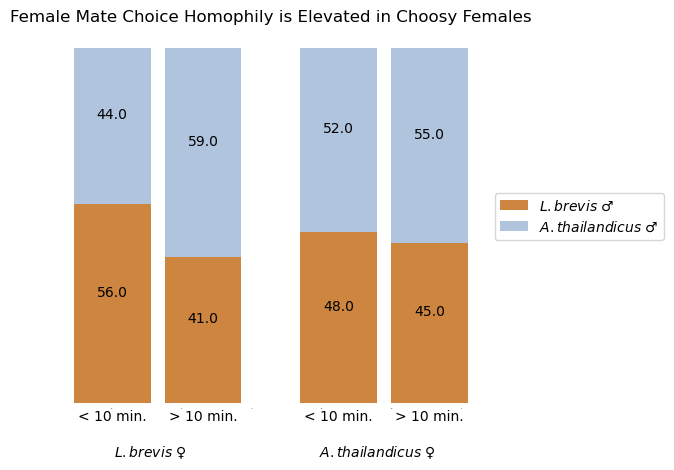

In [253]:
# Example usage
female_groups = ['$\it{L. brevis}$ ♀', '$\it{A. thailandicus}$ ♀']
male_groups = ['$\it{L. brevis}$ ♂', '$\it{A. thailandicus}$ ♂']
time_periods = ['< 10 min.', '> 10 min.']
selections = np.array([[[.56, .44], [.41, .59]],  # Lb ♀ pre and post
                       [[.48,.52 ], [.45, .55]]]) # At ♀ pre and post
colors = ['peru', 'lightsteelblue']  # Example colors, modify as needed
legend_title = "Male Group Choices"
create_final_chart_without_xaxis_values(selections, female_groups, male_groups, time_periods, 0.54, 0.55, 0.5, colors, legend_title)

In [254]:
#FIGURE 3 
#
#
#
#
#
#
#
#
#
#

In [255]:
def create_stacked_column_chart(selections, female_groups, male_groups, column_spacing, legend_spacing, colors):
    """
    Generates a 100% stacked column chart.
    
    :param selections: numpy array of proportions or counts of selections.
    :param female_groups: list of labels for female groups.
    :param male_groups: list of labels for male groups.
    :param column_spacing: float, space between columns.
    :param legend_spacing: float, space around the legend.
    :param colors: list of colors for each male group.
    """
    # Calculating the percentage for the stacked chart
    total_selections = selections.sum(axis=1)
    percentage_selections = selections / total_selections[:, np.newaxis] *100

    # Creating the figure and axes
    fig, ax = plt.subplots()

    # Stacking bars
    bottom_values = np.zeros(len(female_groups))
    for i, male_group in enumerate(male_groups):
        bars = ax.bar(female_groups, percentage_selections[:, i], column_spacing, label=male_group, color=colors[i], bottom=bottom_values)
        bottom_values += percentage_selections[:, i]

        # Adding text inside the bars
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # Only display if there's enough space
                ax.annotate(f'{height:.1f}',
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            xytext=(0, 3),  # Offset for text
                            textcoords="offset points",
                            ha='center', va='bottom')

    # Customizing the chart
    #ax.set_xlabel('Female Groups')
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)  # Remove top spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    ax.set_title('Females inoculated with L. brevis and A. thailandicus')

    # Adjusting legend position and spacing
    ax.legend(loc='center left', bbox_to_anchor=(1, legend_spacing))

    # Removing internal grid or dotted lines
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Show the plot
    plt.tight_layout()
    plt.show()

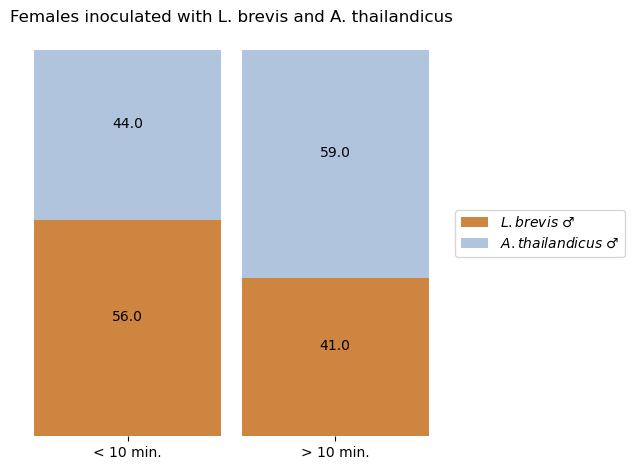

In [256]:
# Example usage
female_groups = ['< 10 min.', '> 10 min.']
male_groups = ['$\it{L. brevis}$ ♂', '$\it{A. thailandicus}$ ♂']
selections = np.array([[.56, .44], [.41, .59]])
colors = ['peru', 'lightsteelblue']  # Example colors, modify as needed
create_stacked_column_chart(selections, female_groups, male_groups, 0.9, 0.5, colors)

In [257]:
def create_stacked_column_chart(selections, female_groups, male_groups, column_spacing, legend_spacing, colors):
    """
    Generates a 100% stacked column chart.
    
    :param selections: numpy array of proportions or counts of selections.
    :param female_groups: list of labels for female groups.
    :param male_groups: list of labels for male groups.
    :param column_spacing: float, space between columns.
    :param legend_spacing: float, space around the legend.
    :param colors: list of colors for each male group.
    """
    # Calculating the percentage for the stacked chart
    total_selections = selections.sum(axis=1)
    percentage_selections = selections / total_selections[:, np.newaxis] *100

    # Creating the figure and axes
    fig, ax = plt.subplots()

    # Stacking bars
    bottom_values = np.zeros(len(female_groups))
    for i, male_group in enumerate(male_groups):
        bars = ax.bar(female_groups, percentage_selections[:, i], column_spacing, label=male_group, color=colors[i], bottom=bottom_values)
        bottom_values += percentage_selections[:, i]

        # Adding text inside the bars
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # Only display if there's enough space
                ax.annotate(f'{height:.1f}',
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            xytext=(0, 3),  # Offset for text
                            textcoords="offset points",
                            ha='center', va='bottom')

    # Customizing the chart
    #ax.set_xlabel('Female Groups')
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)  # Remove top spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    ax.set_title('Females inoculated with L. brevis and A. cibinogensis')

    # Adjusting legend position and spacing
    ax.legend(loc='center left', bbox_to_anchor=(1, legend_spacing))

    # Removing internal grid or dotted lines
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Show the plot
    plt.tight_layout()
    plt.show()

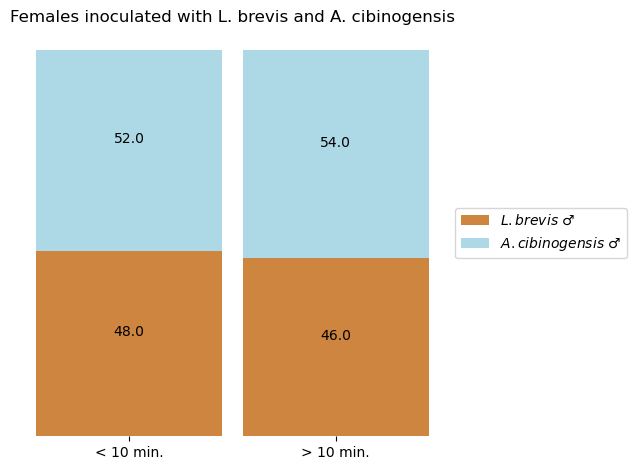

In [258]:
# Example usage
female_groups = ['< 10 min.', '> 10 min.']
male_groups = ['$\it{L. brevis}$ ♂', '$\it{A. cibinogensis}$ ♂']
selections = np.array([[.48, .52], [.46, .54]])
colors = ['peru', 'lightblue']  # Example colors, modify as needed
create_stacked_column_chart(selections, female_groups, male_groups, 0.9, 0.5, colors)

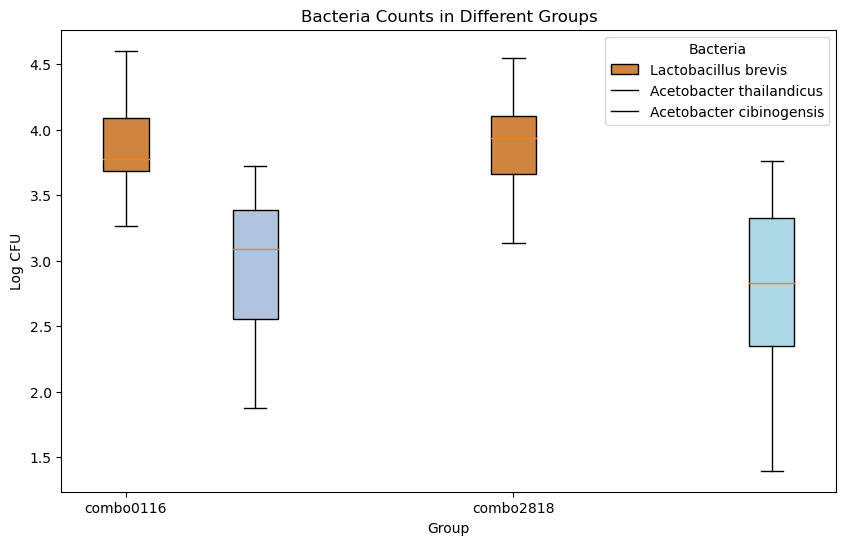

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data from CSV file
data = pd.read_csv('CFU_LOG_DATA.csv')

# Define the colors for each bacteria type
colors = ['peru', 'lightsteelblue', 'lightblue']  # Colors for acetobacter and lactobacillus

# Create the plot
plt.figure(figsize=(10, 6))

# Unique groups and bacteria types
groups = data['Group'].unique()
bacteria_types = data['Bacteria'].unique()

# Width of a bar
width = 0.35

# Create boxplots
for i, group in enumerate(groups):
    for j, bacteria in enumerate(bacteria_types):
        # Subset data for each group and bacteria type
        subset = data[(data['Group'] == group) & (data['Bacteria'] == bacteria)]

        # Position of the boxplot for this group and bacteria type
        position = i * len(bacteria_types) + j + 1

        # Create boxplot
        bp = plt.boxplot(subset['Count'], positions=[position], widths=width, patch_artist=True)

        # Set properties for each box
        for box in bp['boxes']:
            box.set_facecolor(colors[j])

# Set x-ticks and labels
xtick_positions = np.arange(1, len(groups) * len(bacteria_types) + 1, len(bacteria_types))
plt.xticks(xtick_positions, groups)

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Log CFU')
plt.title('Bacteria Counts in Different Groups')

# Add a legend
plt.legend(bacteria_types, title='Bacteria', loc='upper right')

# Show the plot
plt.show()


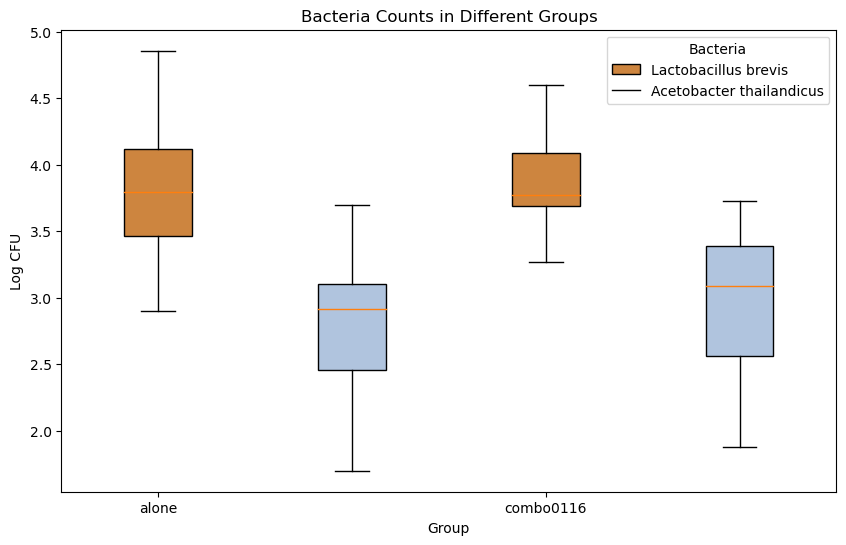

In [260]:
# Read data from CSV file
data = pd.read_csv('CFU_compare_single_to_combo.csv')

# Define the colors for each bacteria type
colors = ['peru', 'lightsteelblue', 'lightblue']  # Colors for acetobacter and lactobacillus

# Create the plot
plt.figure(figsize=(10, 6))

# Unique groups and bacteria types
groups = data['Group'].unique()
bacteria_types = data['Bacteria'].unique()

# Width of a bar
width = 0.35

# Create boxplots
for i, group in enumerate(groups):
    for j, bacteria in enumerate(bacteria_types):
        # Subset data for each group and bacteria type
        subset = data[(data['Group'] == group) & (data['Bacteria'] == bacteria)]

        # Position of the boxplot for this group and bacteria type
        position = i * len(bacteria_types) + j + 1

        # Create boxplot
        bp = plt.boxplot(subset['Count'], positions=[position], widths=width, patch_artist=True)

        # Set properties for each box
        for box in bp['boxes']:
            box.set_facecolor(colors[j])

# Set x-ticks and labels
xtick_positions = np.arange(1, len(groups) * len(bacteria_types) + 1, len(bacteria_types))
plt.xticks(xtick_positions, groups)

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Log CFU')
plt.title('Bacteria Counts in Different Groups')

# Add a legend
plt.legend(bacteria_types, title='Bacteria', loc='upper right')

# Show the plot
plt.show()


In [261]:
# Load the CSV version of the dataset
csv_file_path = 'C:/Users/anjohns-adm/Desktop/Mating Project/FINAL DATA DIRECTORY/single bacteria mating trials for Python.csv'
df = pd.read_csv(csv_file_path)

df = df.dropna(subset=['Time to Mate (sec)'])


In [262]:
df.head()

,Female,Successful Male Species,Time to Mate (sec),Homophily,maleIsL_brevis,maleIsA_thail,didMate
0,A_thailandicus,L_brevis,161.0,0,1,0,1
1,A_thailandicus,A_thailandicus,233.0,1,0,1,1
2,A_thailandicus,A_thailandicus,269.0,1,0,1,1
3,A_thailandicus,L_brevis,308.0,0,1,0,1
4,A_thailandicus,L_brevis,315.0,0,1,0,1


NameError: name 'specific_pair_df' is not defined

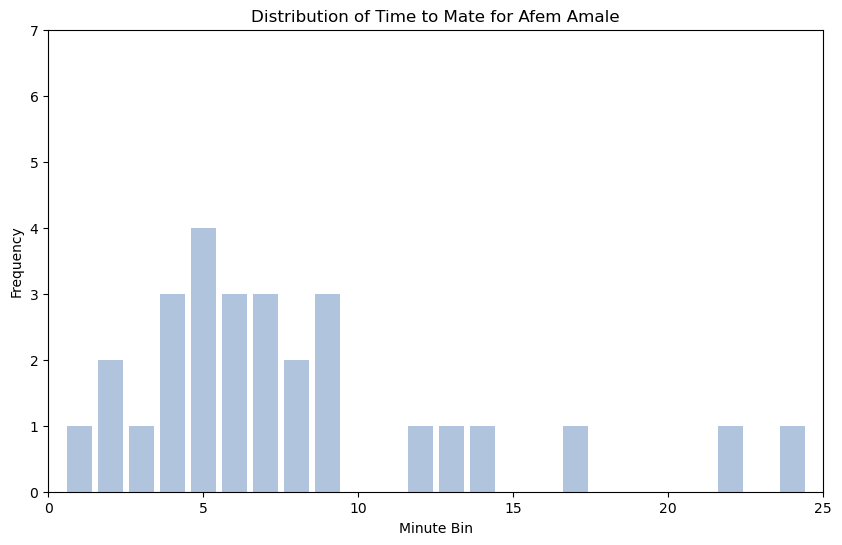

In [263]:
# Filter for A_thailandicus females who mated with A_thailandicus males
AfemAmale_df = df[(df['Female'] == 'A_thailandicus') & (df['Successful Male Species'] == 'A_thailandicus')].copy()

# Now, safe to bin 'Time to Mate (sec)' by minute and convert to integer
AfemAmale_df['Minute_Bin'] = (AfemAmale_df['Time to Mate (sec)'] // 120).astype(int)

# Determine the maximum frequency count across all combinations for setting y-axis limits
# Example: max_count could be determined from your data analysis
max_count = 7

# Adding some buffer to the max count for visual aesthetics
upper_y_limit = max_count 

# When plotting each histogram
plt.figure(figsize=(10, 6))
plt.hist(AfemAmale_df['Minute_Bin'], bins=range(AfemAmale_df['Minute_Bin'].min(), AfemAmale_df['Minute_Bin'].max() + 2), 
         align='left', rwidth=0.8, color='lightsteelblue')
plt.title('Distribution of Time to Mate for Afem Amale')
plt.xlabel('Minute Bin')
plt.ylabel('Frequency')
plt.ylim(0, upper_y_limit)  # Setting the y-axis limit
plt.xlim(0, 25)
plt.xticks(range(specific_pair_df['Minute_Bin'].min(), AfemAmale_df['Minute_Bin'].max() + 1))
plt.show()


NameError: name 'specific_pair_df' is not defined

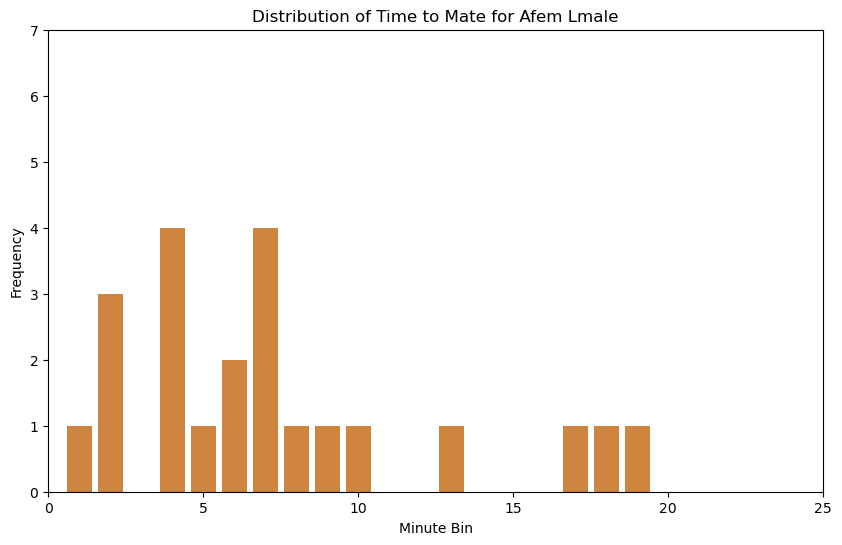

In [264]:
# Filter for A_thailandicus females who mated with A_thailandicus males
AfemLmale_df = df[(df['Female'] == 'A_thailandicus') & (df['Successful Male Species'] == 'L_brevis')].copy()

# Now, safe to bin 'Time to Mate (sec)' by minute and convert to integer
AfemLmale_df['Minute_Bin'] = (AfemLmale_df['Time to Mate (sec)'] // 120).astype(int)

# Determine the maximum frequency count across all combinations for setting y-axis limits
# Example: max_count could be determined from your data analysis
max_count = 7

# Adding some buffer to the max count for visual aesthetics
upper_y_limit = max_count 

# When plotting each histogram
plt.figure(figsize=(10, 6))
plt.hist(AfemLmale_df['Minute_Bin'], bins=range(AfemLmale_df['Minute_Bin'].min(), AfemLmale_df['Minute_Bin'].max() + 2), 
         align='left', rwidth=0.8, color='peru')
plt.title('Distribution of Time to Mate for Afem Lmale')
plt.xlabel('Minute Bin')
plt.ylabel('Frequency')
plt.ylim(0, upper_y_limit)  # Setting the y-axis limit
plt.xlim(0, 25)
plt.xticks(range(specific_pair_df['Minute_Bin'].min(), specific_pair_df['Minute_Bin'].max() + 1))
plt.show()


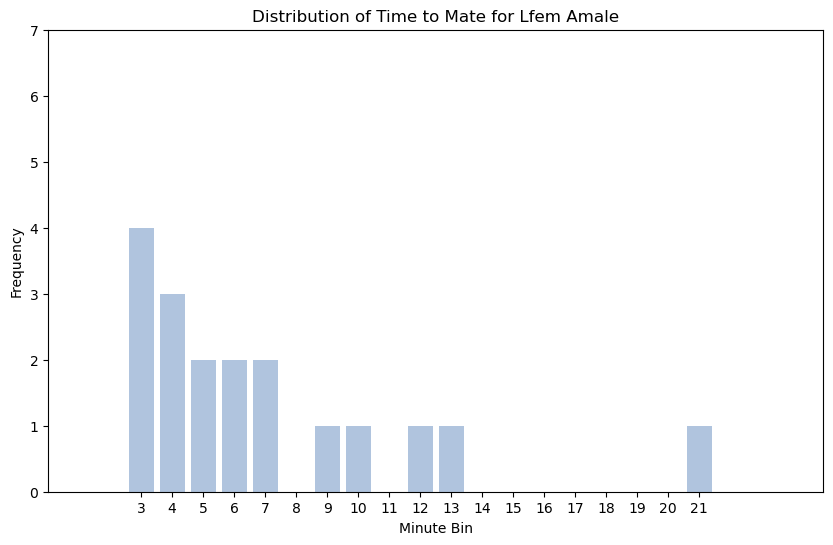

In [265]:
# Filter for A_thailandicus females who mated with A_thailandicus males
LfemAmale_df = df[(df['Female'] == 'L_brevis') & (df['Successful Male Species'] == 'A_thailandicus')].copy()

# Now, safe to bin 'Time to Mate (sec)' by minute and convert to integer
LfemAmale_df['Minute_Bin'] = (LfemAmale_df['Time to Mate (sec)'] // 120).astype(int)

# Determine the maximum frequency count across all combinations for setting y-axis limits
# Example: max_count could be determined from your data analysis
max_count = 7

# Adding some buffer to the max count for visual aesthetics
upper_y_limit = max_count 

# When plotting each histogram
plt.figure(figsize=(10, 6))
plt.hist(LfemAmale_df['Minute_Bin'], bins=range(LfemAmale_df['Minute_Bin'].min(), LfemAmale_df['Minute_Bin'].max() + 2), 
         align='left', rwidth=0.8, color='lightsteelblue')
plt.title('Distribution of Time to Mate for Lfem Amale')
plt.xlabel('Minute Bin')
plt.ylabel('Frequency')
plt.ylim(0, upper_y_limit)  # Setting the y-axis limit
plt.xlim(0, 25)
plt.xticks(range(LfemAmale_df['Minute_Bin'].min(), LfemAmale_df['Minute_Bin'].max() + 1))
plt.show()


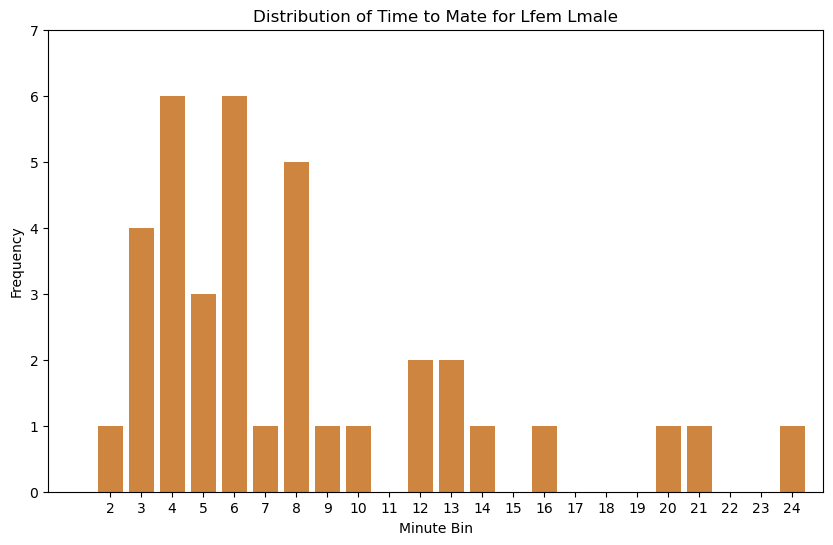

In [266]:
# Filter for A_thailandicus females who mated with A_thailandicus males
LfemLmale_df = df[(df['Female'] == 'L_brevis') & (df['Successful Male Species'] == 'L_brevis')].copy()

# Now, safe to bin 'Time to Mate (sec)' by minute and convert to integer
LfemLmale_df['Minute_Bin'] = (LfemLmale_df['Time to Mate (sec)'] // 120).astype(int)

# Determine the maximum frequency count across all combinations for setting y-axis limits
# Example: max_count could be determined from your data analysis
max_count = 7

# Adding some buffer to the max count for visual aesthetics
upper_y_limit = max_count 

# When plotting each histogram
plt.figure(figsize=(10, 6))
plt.hist(LfemLmale_df['Minute_Bin'], bins=range(LfemLmale_df['Minute_Bin'].min(), LfemLmale_df['Minute_Bin'].max() + 2), 
         align='left', rwidth=0.8, color='peru')
plt.title('Distribution of Time to Mate for Lfem Lmale')
plt.xlabel('Minute Bin')
plt.ylabel('Frequency')
plt.ylim(0, upper_y_limit)  # Setting the y-axis limit
plt.xlim(0, 25)
plt.xticks(range(LfemLmale_df['Minute_Bin'].min(), LfemLmale_df['Minute_Bin'].max() + 1))
plt.show()


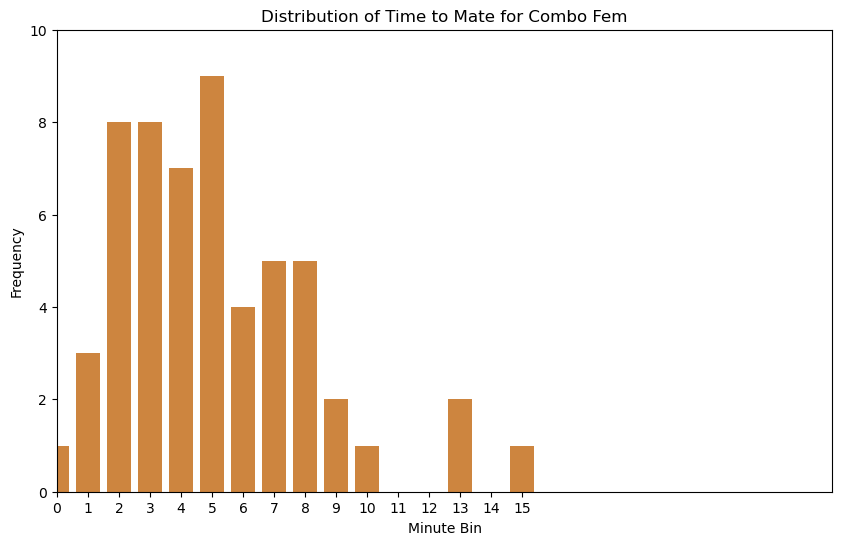

In [267]:
# Filter for combo females who mated
ComboFem_df = df[(df['Female'] == 'Combo')].copy()
ComboFem_df = ComboFem_df.dropna(subset=['Time to Mate (sec)'])


# Now, safe to bin 'Time to Mate (sec)' by minute and convert to integer
ComboFem_df['Minute_Bin'] = (ComboFem_df['Time to Mate (sec)'] // 120).astype(int)

# Determine the maximum frequency count across all combinations for setting y-axis limits
# Example: max_count could be determined from your data analysis
max_count = 10

# Adding some buffer to the max count for visual aesthetics
upper_y_limit = max_count 

# When plotting each histogram
plt.figure(figsize=(10, 6))
plt.hist(ComboFem_df['Minute_Bin'], bins=range(ComboFem_df['Minute_Bin'].min(), ComboFem_df['Minute_Bin'].max() + 2), 
         align='left', rwidth=0.8, color='peru')
plt.title('Distribution of Time to Mate for Combo Fem')
plt.xlabel('Minute Bin')
plt.ylabel('Frequency')
plt.ylim(0, upper_y_limit)  # Setting the y-axis limit
plt.xlim(0, 25)
plt.xticks(range(ComboFem_df['Minute_Bin'].min(), ComboFem_df['Minute_Bin'].max() + 1))
plt.show()

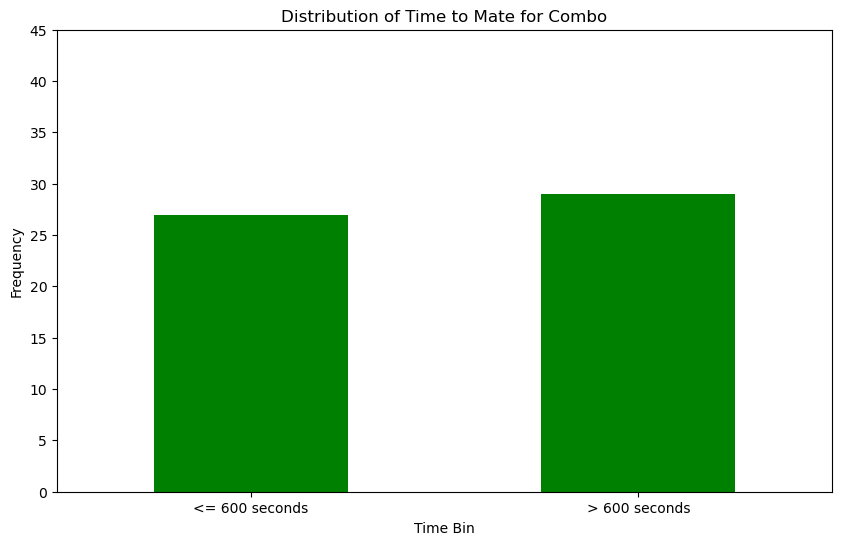

In [268]:
import matplotlib.pyplot as plt

# Assuming ComboCibFem_df is your DataFrame after filtering and dropping NaNs

# Categorize 'Time to Mate (sec)' into two bins: <= 600 and > 600 seconds
ComboFem_df['Time_Bin'] = ['<= 600 seconds' if x <= 600 else '> 600 seconds' for x in ComboFem_df['Time to Mate (sec)']]

# Count the frequency of each category
time_bin_counts = ComboFem_df['Time_Bin'].value_counts().reindex(['<= 600 seconds', '> 600 seconds'], fill_value=0)

max_count = 45

# Plotting
plt.figure(figsize=(10, 6))
time_bin_counts.plot(kind='bar', color='green')
plt.title('Distribution of Time to Mate for Combo')
plt.xlabel('Time Bin')
plt.ylabel('Frequency')
plt.ylim(0, max_count)  # Assuming max_count is defined as before
plt.xticks(rotation=0)  # Keep the x-tick labels horizontal for readability
plt.show()


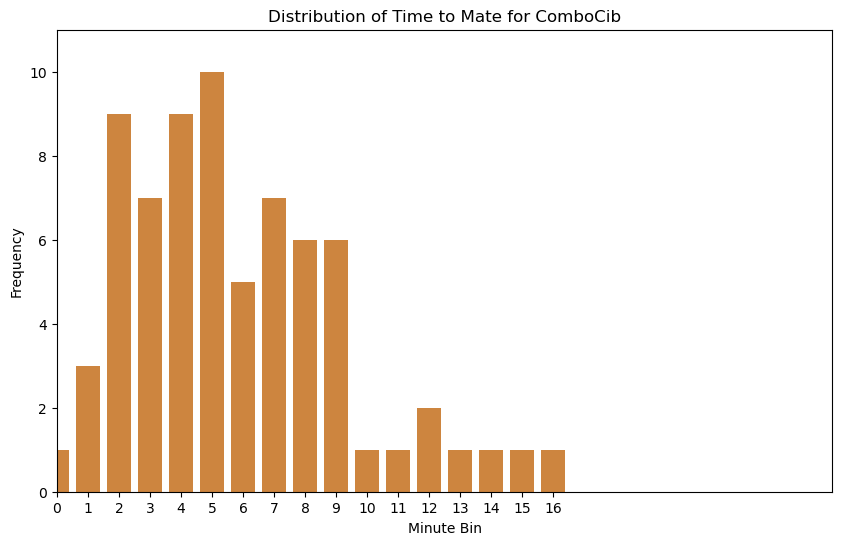

In [269]:
# Filter for A_thailandicus females who mated with A_thailandicus males
ComboCibFem_df = df[(df['Female'] == 'ComboCib')].copy()
ComboCibFem_df = ComboCibFem_df.dropna(subset=['Time to Mate (sec)'])


# Now, safe to bin 'Time to Mate (sec)' by minute and convert to integer
ComboCibFem_df['Minute_Bin'] = (ComboCibFem_df['Time to Mate (sec)'] // 120).astype(int)

# Determine the maximum frequency count across all combinations for setting y-axis limits
# Example: max_count could be determined from your data analysis
max_count = 11

# Adding some buffer to the max count for visual aesthetics
upper_y_limit = max_count 

# When plotting each histogram
plt.figure(figsize=(10, 6))
plt.hist(ComboCibFem_df['Minute_Bin'], bins=range(ComboCibFem_df['Minute_Bin'].min(), ComboCibFem_df['Minute_Bin'].max() + 2), 
         align='left', rwidth=0.8, color='peru')
plt.title('Distribution of Time to Mate for ComboCib')
plt.xlabel('Minute Bin')
plt.ylabel('Frequency')
plt.ylim(0, upper_y_limit)  # Setting the y-axis limit
plt.xlim(0, 25)
plt.xticks(range(ComboCibFem_df['Minute_Bin'].min(), ComboCibFem_df['Minute_Bin'].max() + 1))
plt.show()

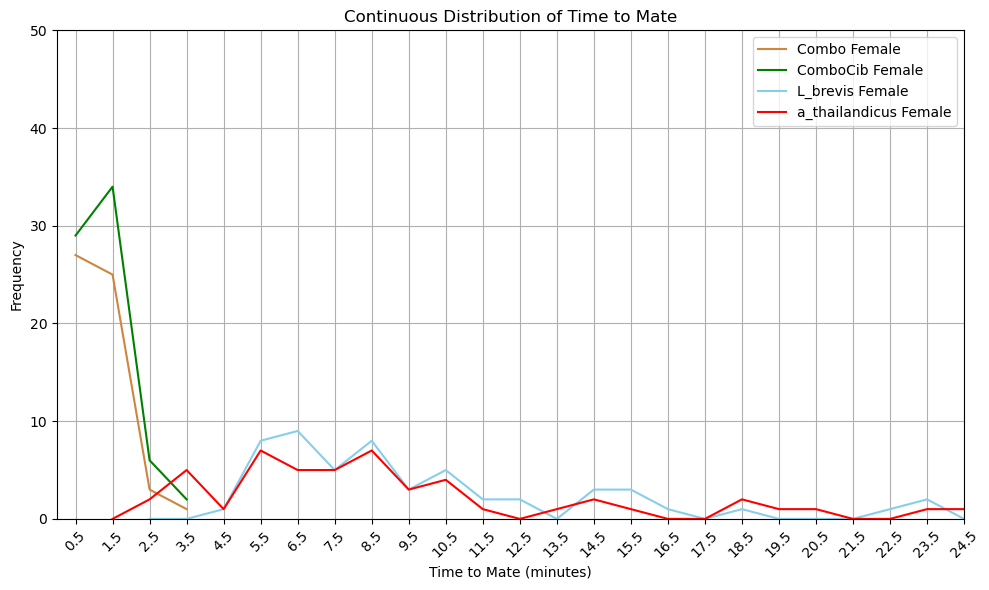

In [304]:
# Continue with your filtered and binned DataFrame ComboFem_df
# Filter for A_thailandicus females who mated with A_thailandicus males
ComboFem_df = df[(df['Female'] == 'Combo')].copy()
ComboFem_df = ComboFem_df.dropna(subset=['Time to Mate (sec)'])
ComboFem_df['Minute_Bin'] = (ComboFem_df['Time to Mate (sec)'] // 600).astype(int)

# Continue with your filtered and binned DataFrame ComboFem_df
# Filter for A_thailandicus females who mated with A_thailandicus males
ComboCibFem_df = df[(df['Female'] == 'ComboCib')].copy()
ComboCibFem_df = ComboCibFem_df.dropna(subset=['Time to Mate (sec)'])
ComboCibFem_df['Minute_Bin'] = (ComboCibFem_df['Time to Mate (sec)'] // 600).astype(int)

#L_brevis Female time to mate code
# Filter for A_thailandicus females who mated with A_thailandicus males
L_brevisFem_df = df[(df['Female'] == 'L_brevis')].copy()
L_brevisFem_df = L_brevisFem_df.dropna(subset=['Time to Mate (sec)'])
L_brevisFem_df['Minute_Bin'] = (L_brevisFem_df['Time to Mate (sec)'] // 120).astype(int)

#A_thailandicus Female time to mate code
# Filter for A_thailandicus females who mated with A_thailandicus males
A_thailandicusFem_df = df[(df['Female'] == 'A_thailandicus')].copy()
A_thailandicusFem_df = A_thailandicusFem_df.dropna(subset=['Time to Mate (sec)'])
A_thailandicusFem_df['Minute_Bin'] = (A_thailandicusFem_df['Time to Mate (sec)'] // 120).astype(int)

L_brevisHomo_df = L_brevisFem_df[(L_brevisFem_df['Homophily'] == 1)].copy()
L_brevisHet_df = L_brevisFem_df[(L_brevisFem_df['Homophily'] == 0)].copy()
A_thailHomo_df = A_thailandicusFem_df[(A_thailandicusFem_df['Homophily']) == 1].copy()
A_thailHet_df = A_thailandicusFem_df[(A_thailandicusFem_df['Homophily']) == 0].copy()


# Set the figure
plt.figure(figsize=(10, 6))

# Plot for Combo Female
bin_edges_combo = np.arange(ComboFem_df['Minute_Bin'].min(), ComboFem_df['Minute_Bin'].max() + 2)
bin_midpoints_combo = (bin_edges_combo[:-1] + bin_edges_combo[1:]) / 2
frequencies_combo, _ = np.histogram(ComboFem_df['Minute_Bin'], bins=bin_edges_combo - ComboFem_df['Minute_Bin'].min())
plt.plot(bin_midpoints_combo, frequencies_combo, linestyle='-', color='peru', label='Combo Female')

# Plot for ComboCib Female
bin_edges_comboCib = np.arange(ComboCibFem_df['Minute_Bin'].min(), ComboCibFem_df['Minute_Bin'].max() + 2)
bin_midpoints_comboCib = (bin_edges_comboCib[:-1] + bin_edges_comboCib[1:]) / 2
frequencies_comboCib, _ = np.histogram(ComboCibFem_df['Minute_Bin'], bins=bin_edges_comboCib - ComboCibFem_df['Minute_Bin'].min())
plt.plot(bin_midpoints_comboCib, frequencies_comboCib, linestyle='-', color='green', label='ComboCib Female')

# Plot for L_brevis Female
bin_edges_l_brevis = np.arange(L_brevisFem_df['Minute_Bin'].min(), L_brevisFem_df['Minute_Bin'].max() + 2)
bin_midpoints_l_brevis = (bin_edges_l_brevis[:-1] + bin_edges_l_brevis[1:]) / 2
frequencies_l_brevis, _ = np.histogram(L_brevisFem_df['Minute_Bin'], bins=bin_edges_l_brevis - L_brevisFem_df['Minute_Bin'].min())
plt.plot(bin_midpoints_l_brevis, frequencies_l_brevis, linestyle='-', color='skyblue', label='L_brevis Female')

# Plot for A_thailandcus Female
bin_edges_a_thailandicus = np.arange(A_thailandicusFem_df['Minute_Bin'].min(), A_thailandicusFem_df['Minute_Bin'].max() + 2)
bin_midpoints_a_thailandicus = (bin_edges_a_thailandicus[:-1] + bin_edges_a_thailandicus[1:]) / 2
frequencies_a_thailandicus, _ = np.histogram(A_thailandicusFem_df['Minute_Bin'], bins=bin_edges_a_thailandicus - A_thailandicusFem_df['Minute_Bin'].min())
plt.plot(bin_midpoints_a_thailandicus, frequencies_a_thailandicus, linestyle='-', color='red', label='a_thailandicus Female')

# Customize the plot
plt.title('Continuous Distribution of Time to Mate')
plt.xlabel('Time to Mate (minutes)')
plt.ylabel('Frequency')
# Assuming upper_y_limit is defined as the maximum frequency + buffer from either distribution
upper_y_limit = max(max(frequencies_combo), max(frequencies_l_brevis)) + 5
plt.ylim(0, 50)
plt.xlim(0, 5)  # Adjust based on the range of your data
# Ensure x-ticks cover the range of minute bins for both distributions
all_midpoints = np.union1d(bin_midpoints_combo, bin_midpoints_l_brevis)
plt.xticks(all_midpoints, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

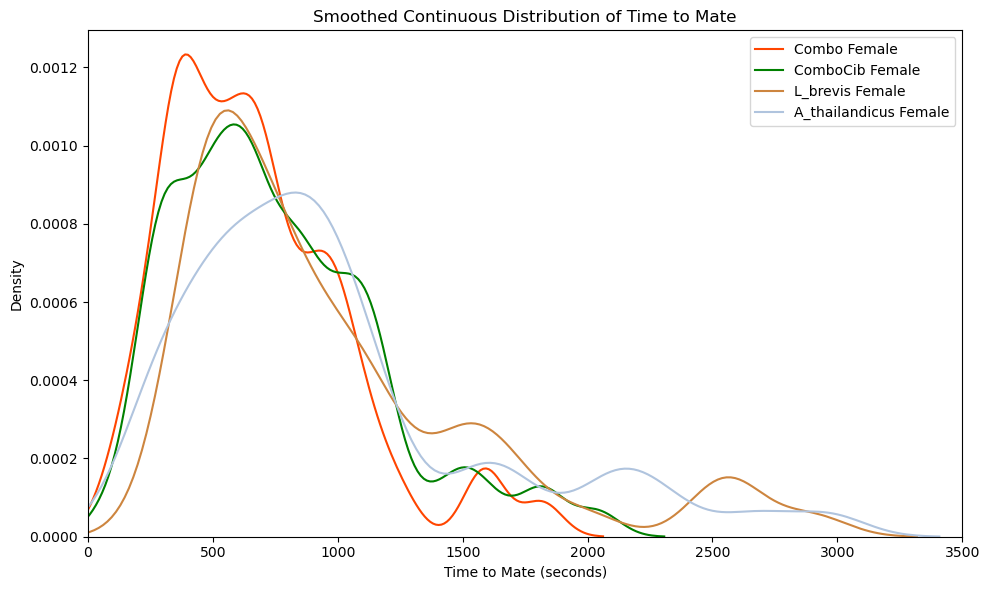

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure
plt.figure(figsize=(10, 6))

# KDE plot for Combo Female
sns.kdeplot(data=ComboFem_df, x='Time to Mate (sec)', bw_adjust=0.5, color='orangered', label='Combo Female', linestyle='-')

# KDE plot for ComboCib Female
sns.kdeplot(data=ComboCibFem_df, x='Time to Mate (sec)', bw_adjust=0.5, color='green', label='ComboCib Female', linestyle='-')


# KDE plot for L_brevis Female
sns.kdeplot(data=L_brevisFem_df, x='Time to Mate (sec)', bw_adjust=0.5, color='peru', label='L_brevis Female', linestyle='-')

# KDE plot for A_thailandicus Female
sns.kdeplot(data=A_thailandicusFem_df, x='Time to Mate (sec)', bw_adjust=0.5, color='lightsteelblue', label='A_thailandicus Female', linestyle='-')

# Customize the plot
plt.title('Smoothed Continuous Distribution of Time to Mate')
plt.xlabel('Time to Mate (seconds)')
plt.ylabel('Density')
plt.xlim(0, 3500)  # Adjust based on the range of your data; converting minutes back to seconds
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


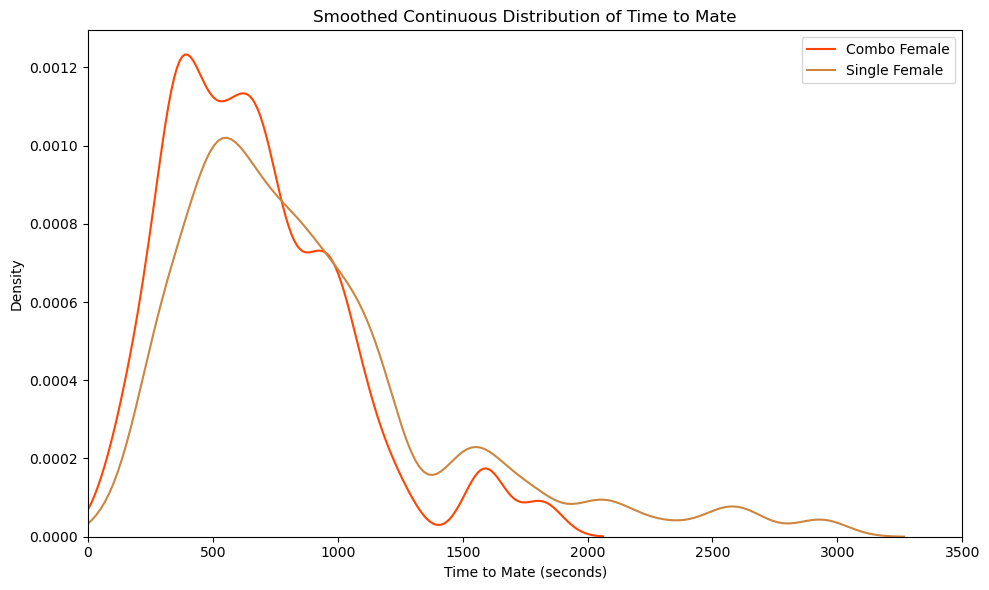

In [272]:
# Continue with your filtered and binned DataFrame ComboFem_df
# Filter for A_thailandicus females who mated with A_thailandicus males
ComboFem_df = df[(df['Female'] == 'Combo')].copy()
ComboFem_df = ComboFem_df.dropna(subset=['Time to Mate (sec)'])
ComboFem_df['Minute_Bin'] = (ComboFem_df['Time to Mate (sec)'] // 120).astype(int)

SingleFem_df = df[(df['Female'] != 'Combo')].copy()
SingleFem_df = SingleFem_df.dropna(subset=['Time to Mate (sec)'])
SingleFem_df['Minute_Bin'] = (SingleFem_df['Time to Mate (sec)'] // 120).astype(int)

# Set the figure
plt.figure(figsize=(10, 6))

# KDE plot for Combo Female
sns.kdeplot(data=ComboFem_df, x='Time to Mate (sec)', bw_adjust=0.5, color='orangered', label='Combo Female', linestyle='-')

# KDE plot for L_brevis Female
sns.kdeplot(data=SingleFem_df, x='Time to Mate (sec)', bw_adjust=0.5, color='peru', label='Single Female', linestyle='-')

# Customize the plot
plt.title('Smoothed Continuous Distribution of Time to Mate')
plt.xlabel('Time to Mate (seconds)')
plt.ylabel('Density')
plt.xlim(0, 3500)  # Adjust based on the range of your data; converting minutes back to seconds
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


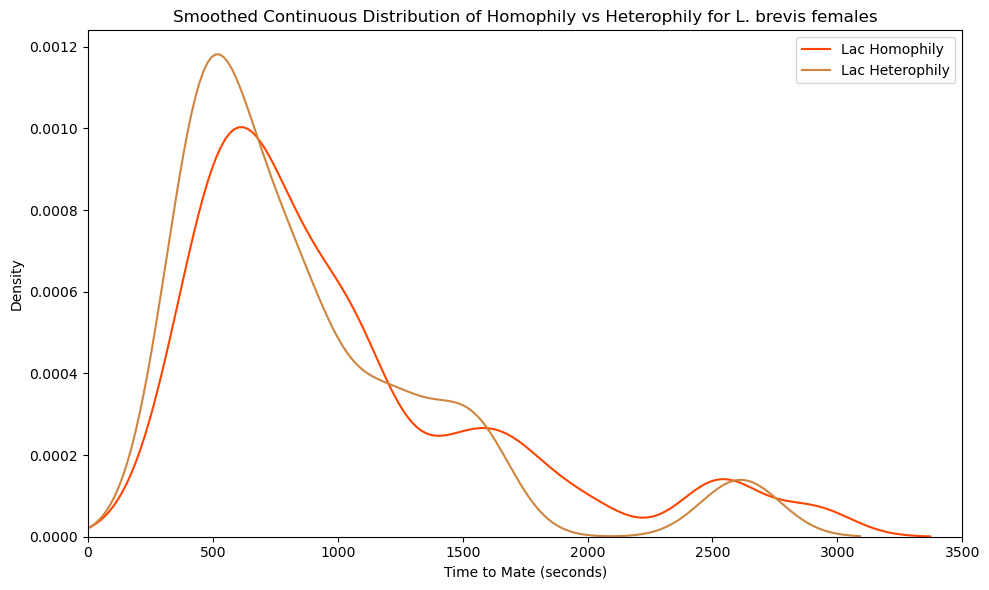

KS Statistic: 0.25375375375375375, P-Value: 0.35810615966147374


In [312]:
# Set the figure
plt.figure(figsize=(10, 6))

# KDE plot for Combo Female
sns.kdeplot(data=L_brevisHomo_df, x='Time to Mate (sec)', bw_adjust=0.5, color='orangered', label='Lac Homophily', linestyle='-')

# KDE plot for L_brevis Female
sns.kdeplot(data=L_brevisHet_df, x='Time to Mate (sec)', bw_adjust=0.5, color='peru', label='Lac Heterophily', linestyle='-')

# Customize the plot
plt.title('Smoothed Continuous Distribution of Homophily vs Heterophily for L. brevis females')
plt.xlabel('Time to Mate (seconds)')
plt.ylabel('Density')
plt.xlim(0, 3500)  # Adjust based on the range of your data; converting minutes back to seconds
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = L_brevisHomo_df[(L_brevisHomo_df['Female'] == 'L_brevis')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = L_brevisHet_df[(L_brevisHet_df['Female'] == 'L_brevis')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

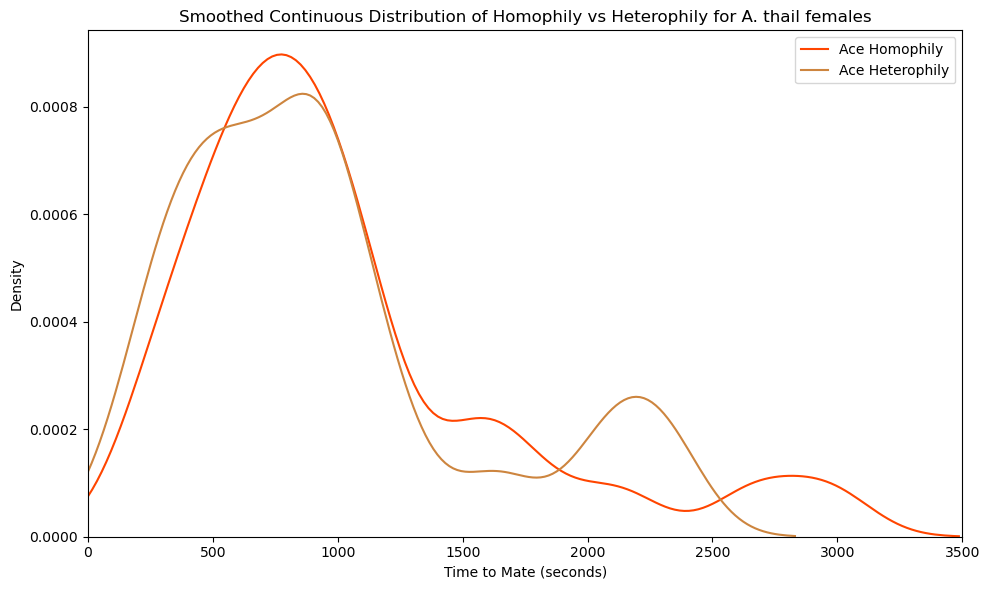

KS Statistic: 0.12987012987012986, P-Value: 0.9640816419899468


In [313]:
A_thailHomo_df = A_thailandicusFem_df[(A_thailandicusFem_df['Homophily']) == 1].copy()
A_thailHet_df = A_thailandicusFem_df[(A_thailandicusFem_df['Homophily']) == 0].copy()


# Set the figure
plt.figure(figsize=(10, 6))

# KDE plot for Combo Female
sns.kdeplot(data=A_thailHomo_df, x='Time to Mate (sec)', bw_adjust=0.5, color='orangered', label='Ace Homophily', linestyle='-')

# KDE plot for L_brevis Female
sns.kdeplot(data=A_thailHet_df, x='Time to Mate (sec)', bw_adjust=0.5, color='peru', label='Ace Heterophily', linestyle='-')

# Customize the plot
plt.title('Smoothed Continuous Distribution of Homophily vs Heterophily for A. thail females')
plt.xlabel('Time to Mate (seconds)')
plt.ylabel('Density')
plt.xlim(0, 3500)  # Adjust based on the range of your data; converting minutes back to seconds
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = A_thailHomo_df[(A_thailHomo_df['Female'] == 'A_thailandicus')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = A_thailHet_df[(A_thailHet_df['Female'] == 'A_thailandicus')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")



In [273]:
# Extract 'Time to Mate (sec)' for the first combination (e.g., CanA_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Female'] == 'A_thailandicus') & (df['Successful Male Species'] == 'A_thailandicus')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Female'] == 'A_thailandicus') & (df['Successful Male Species'] == 'L_brevis')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.12987012987012986, P-Value: 0.9640816419899468


In [274]:
# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Female'] == 'L_brevis') & (df['Successful Male Species'] == 'A_thailandicus')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Female'] == 'L_brevis') & (df['Successful Male Species'] == 'L_brevis')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.25375375375375375, P-Value: 0.35810615966147374


In [275]:
# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Female'] == 'A_thailandicus') & (df['Successful Male Species'] == 'A_thailandicus')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Female'] == 'L_brevis') & (df['Successful Male Species'] == 'A_thailandicus')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.24603174603174602, P-Value: 0.4435158016378185


In [276]:
# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Female'] == 'A_thailandicus') & (df['Successful Male Species'] == 'L_brevis')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Female'] == 'L_brevis') & (df['Successful Male Species'] == 'L_brevis')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.1547911547911548, P-Value: 0.8342235535985032


In [277]:
# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Female'] == 'A_thailandicus')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Female'] == 'L_brevis')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.12181818181818181, P-Value: 0.7789271629664879


In [278]:
# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Successful Male Species'] == 'A_thailandicus')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Successful Male Species'] == 'L_brevis')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.0864985994397759, P-Value: 0.8429056979617419


In [279]:
# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Female'] == 'A_thailandicus')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Female'] == 'Combo')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.26285714285714284, P-Value: 0.04097996821703042


In [280]:
# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Female'] == 'L_brevis')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Female'] == 'Combo')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.2314935064935065, P-Value: 0.07540926365669462


In [281]:
# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Female'] == 'ComboCib')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Female'] == 'Combo')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.13229376257545272, P-Value: 0.5835377273384648


In [282]:
#FIGURE 3 STATISTIC

# Extract 'Time to Mate (sec)' for the first combination (e.g., A_thailandicus females with A_thailandicus males)
combination_1 = df[(df['Female'] != 'Combo') & (df['Female'] != 'ComboCib')]['Time to Mate (sec)']

# Extract 'Time to Mate (sec)' for the second combination (e.g., A_thailandicus females with L_brevis males)
combination_2 = df[(df['Female'] == 'Combo')]['Time to Mate (sec)']

# Perform the KS test
ks_stat, ks_p_value = ks_2samp(combination_1, combination_2)

print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.24285714285714285, P-Value: 0.021952939273751585


In [283]:
print(df.head())

           Female Successful Male Species  Time to Mate (sec)  Homophily  \
0  A_thailandicus                L_brevis               161.0          0   
1  A_thailandicus          A_thailandicus               233.0          1   
2  A_thailandicus          A_thailandicus               269.0          1   
3  A_thailandicus                L_brevis               308.0          0   
4  A_thailandicus                L_brevis               315.0          0   

   maleIsL_brevis  maleIsA_thail  didMate  
0               1              0        1  
1               0              1        1  
2               0              1        1  
3               1              0        1  
4               1              0        1  


In [284]:
#FIGURE 1 STATISTIC PRIMARY

import scipy.stats as stats

# Count successes for L_brevis females
successes_l_brevis = df[(df['Female'] == 'L_brevis')]['maleIsL_brevis'].sum()
trials_l_brevis = len(df[df['Female'] == 'L_brevis'])
failures_l_brevis = trials_l_brevis - successes_l_brevis

# Count successes for A_thailandicus females
successes_a_thailandicus = df[(df['Female'] == 'A_thailandicus')]['maleIsL_brevis'].sum()
trials_a_thailandicus = len(df[df['Female'] == 'A_thailandicus'])
failures_a_thailandicus = trials_a_thailandicus - successes_a_thailandicus

# Construct the contingency table
contingency_table = [
    [successes_l_brevis, failures_l_brevis],  # Data for L_brevis females
    [successes_a_thailandicus, failures_a_thailandicus]  # Data for A_thailandicus females
]

# Perform Fisher's Exact Test
odds_ratio, p_value = stats.fisher_exact(contingency_table)

print(f"Odds Ratio: {odds_ratio}, P-value: {p_value}")

Odds Ratio: 2.6161616161616164, P-value: 0.01917972187772762


In [285]:
#Figure 1 statistic secondary

from scipy.stats import binomtest

binomtest(successes_l_brevis, trials_l_brevis, p = 0.5,
           alternative = "greater")

BinomTestResult(k=37, n=55, alternative='greater', statistic=0.6727272727272727, pvalue=0.007226916766913864)

In [286]:
#Figure 1 statistic secondary

# Count successes for A_thailandicus females
successes_a_thailandicus = df[(df['Female'] == 'A_thailandicus')]['maleIsA_thail'].sum()
trials_a_thailandicus = len(df[df['Female'] == 'A_thailandicus'])
failures_a_thailandicus = trials_a_thailandicus - successes_a_thailandicus


binomtest(successes_a_thailandicus, trials_a_thailandicus, p = 0.5,
           alternative = "greater")

BinomTestResult(k=28, n=50, alternative='greater', statistic=0.56, pvalue=0.23994383084916393)

In [287]:
#FIGURE 2 STATISTICS

# Count successes for L_brevis females
successes_l_brevis = df[(df['Female'] == 'L_brevis')]['maleIsL_brevis'].sum()
trials_l_brevis = len(df[df['Female'] == 'L_brevis'])
failures_l_brevis = trials_l_brevis - successes_l_brevis

# Count successes for A_thailandicus females
successes_a_thailandicus = df[(df['Female'] == 'A_thailandicus')]['maleIsL_brevis'].sum()
trials_a_thailandicus = len(df[df['Female'] == 'A_thailandicus'])
failures_a_thailandicus = trials_a_thailandicus - successes_a_thailandicus

successes_combo = df[(df['Female'] == 'Combo')]['maleIsL_brevis'].sum()
trials_combo = len(df[df['Female'] == 'Combo'])
failures_combo = trials_combo - successes_combo


# Construct the contingency table
contingency_table = [
    [successes_l_brevis, failures_l_brevis],  # Data for L_brevis females
    [successes_combo, failures_combo]  # Data for A_thailandicus females
]

# Perform Fisher's Exact Test
odds_ratio, p_value = stats.fisher_exact(contingency_table)

print(f"Combo vs Lactobacilus Odds Ratio: {odds_ratio}, P-value: {p_value}")



# Construct the contingency table
contingency_table = [
    [successes_a_thailandicus, failures_a_thailandicus],  # Data for L_brevis females
    [successes_combo, failures_combo]  # Data for A_thailandicus females
]

# Perform Fisher's Exact Test
odds_ratio, p_value = stats.fisher_exact(contingency_table)

print(f"Combo vs Acetobacter Odds Ratio: {odds_ratio}, P-value: {p_value}")

binomtest(successes_combo, trials_combo, p = 0.5,
           alternative = "greater")


Combo vs Lactobacilus Odds Ratio: 2.207818930041152, P-value: 0.0550004169154346
Combo vs Acetobacter Odds Ratio: 0.843915343915344, P-value: 0.6998487335097554


BinomTestResult(k=27, n=56, alternative='greater', statistic=0.48214285714285715, pvalue=0.6555601196383303)

In [288]:
#Figure 2 additional
# Constructing the contingency table
contingency_table = np.array([
    [successes_l_brevis, failures_l_brevis],
    [successes_a_thailandicus, failures_a_thailandicus],
    [successes_combo, failures_combo]
])
from scipy.stats import chi2_contingency

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p}")


Chi2 Statistic: 6.634482100070473, P-value: 0.036252713328717226


In [289]:
#figure 4 statistic

successes_comboCib = df[(df['Female'] == 'ComboCib')]['maleIsL_brevis'].sum()
trials_comboCib = len(df[df['Female'] == 'ComboCib'])
failures_comboCib = trials_comboCib - successes_comboCib

# Construct the contingency table
contingency_table = [
    [successes_comboCib, failures_comboCib],  # Data for L_brevis females
    [successes_combo, failures_combo]  # Data for A_thailandicus females
]

# Perform Fisher's Exact Test
odds_ratio, p_value = stats.fisher_exact(contingency_table)

print(f"Combo vs combo Odds Ratio: {odds_ratio}, P-value: {p_value}")
print(trials_comboCib)
print(successes_comboCib)
binomtest(successes_comboCib, trials_comboCib, p = 0.5,
           alternative = "greater")

Combo vs combo Odds Ratio: 0.9327485380116959, P-value: 0.8598718910007257
71
33


BinomTestResult(k=33, n=71, alternative='greater', statistic=0.4647887323943662, pvalue=0.7616561032828623)

In [290]:
#ComboFem_df['Time_Bin'] = [1 if x <= 600 else 1000 if x <= 1200 else 10000000 for x in ComboFem_df['Time to Mate (sec)']]
#A_thailandicusFem_df['Time_Bin'] = [1 if x <= 600 else 1000 if x <= 1200 else 10000000 for x in A_thailandicusFem_df['Time to Mate (sec)']]
#L_brevisFem_df['Time_Bin'] = [1 if x <= 600 else 1000 if x <= 1200 else 10000000 for x in L_brevisFem_df['Time to Mate (sec)']]


#print(f"Combo {ComboFem_df['Time_Bin'].sum()}")
#print(f"Ace {A_thailandicusFem_df['Time_Bin'].sum()}")
#print(f"Lac {L_brevisFem_df['Time_Bin'].sum()}")

In [291]:
#df = df[df['Female'] != 'ComboCib']



In [292]:
groups = ['< 10 minutes', '10-20 minutes', '>20 minutes']
combo_proportions = [0.4821, 0.4464, 0.0714]  # Example proportions for 'Combo'
lab_proportions = [0.3143, 0.4476, 0.2381]  # Example proportions for 'L_brevis/A_thailandicus'


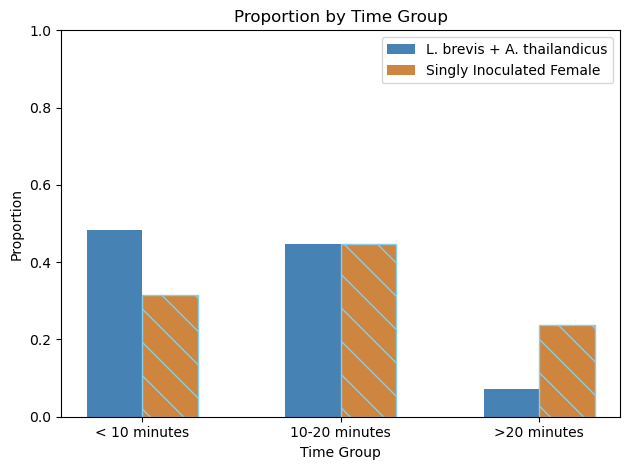

In [293]:
import numpy as np
import matplotlib.pyplot as plt

# Setting the positions and width for the bars
positions = np.arange(len(groups))
distance_factor = .5  # Adjust this factor to control the distance
positions = np.arange(len(groups)) * distance_factor
bar_width = 0.14

# Plotting 'Combo' bars
# Plotting 'Combo' bars with color
plt.bar(positions - bar_width/2, combo_proportions, bar_width, label='L. brevis + A. thailandicus', color='steelblue')

# Adding hatches with a different color (workaround for older Matplotlib versions)
#plt.bar(positions - bar_width/2, combo_proportions, bar_width, label='_nolegend_', color='none', edgecolor='red', hatch='//')

# Plotting 'L_brevis/A_thailandicus' bars
plt.bar(positions + bar_width/2, lab_proportions, bar_width, label='Singly Inoculated Female', color='peru')
plt.bar(positions + bar_width/2, lab_proportions, bar_width, label='_nolegend_', color='none', edgecolor='skyblue', hatch='\\')

# Adding labels, title, and customizing axes
plt.xlabel('Time Group')
plt.ylabel('Proportion')
plt.title('Proportion by Time Group')
plt.xticks(positions, groups)
plt.legend()

# Customizing axes limits, if needed
plt.ylim(0, 1)  # Example: setting y-axis from 0 to 1 for proportions

plt.tight_layout()
plt.show()


In [294]:

def categorize_time(x):
    if x <= 600:
        return 'Group 1: <= 600'
    elif 601 <= x <= 1200:
        return 'Group 2: 601-1200'
    else:
        return 'Group 3: > 1200'

df['Time_Group'] = df['Time to Mate (sec)'].apply(categorize_time)

time_group_distribution = pd.crosstab(df['Female'], df['Time_Group'])

df['Female_Combined'] = df['Female'].apply(lambda x: 'L_brevis/A_thailandicus' if x in ['L_brevis', 'A_thailandicus'] else x)




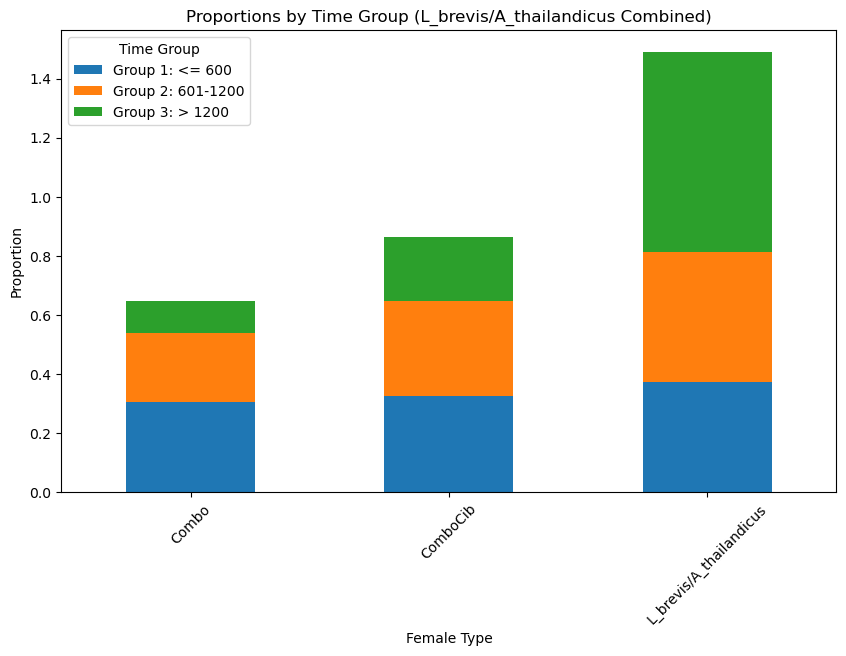

In [295]:
# Crosstab with normalization across each 'Female_Combined' type for each 'Time_Group'
time_group_proportions = pd.crosstab(df['Female_Combined'], df['Time_Group'], normalize='columns')


time_group_proportions.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Proportions by Time Group (L_brevis/A_thailandicus Combined)')
plt.xlabel('Female Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Time Group', loc='upper left')
plt.show()


In [299]:

print(df.head())

           Female Successful Male Species  Time to Mate (sec)  Homophily  \
0  A_thailandicus                L_brevis               161.0          0   
1  A_thailandicus          A_thailandicus               233.0          1   
2  A_thailandicus          A_thailandicus               269.0          1   
3  A_thailandicus                L_brevis               308.0          0   
4  A_thailandicus                L_brevis               315.0          0   

   maleIsL_brevis  maleIsA_thail  didMate       Time_Group  \
0               1              0        1  Group 1: <= 600   
1               0              1        1  Group 1: <= 600   
2               0              1        1  Group 1: <= 600   
3               1              0        1  Group 1: <= 600   
4               1              0        1  Group 1: <= 600   

           Female_Combined  
0  L_brevis/A_thailandicus  
1  L_brevis/A_thailandicus  
2  L_brevis/A_thailandicus  
3  L_brevis/A_thailandicus  
4  L_brevis/A_thailandicu

In [300]:
list(df.columns.values)

['Female',
 'Successful Male Species',
 'Time to Mate (sec)',
 'Homophily',
 'maleIsL_brevis',
 'maleIsA_thail',
 'didMate',
 'Time_Group',
 'Female_Combined']

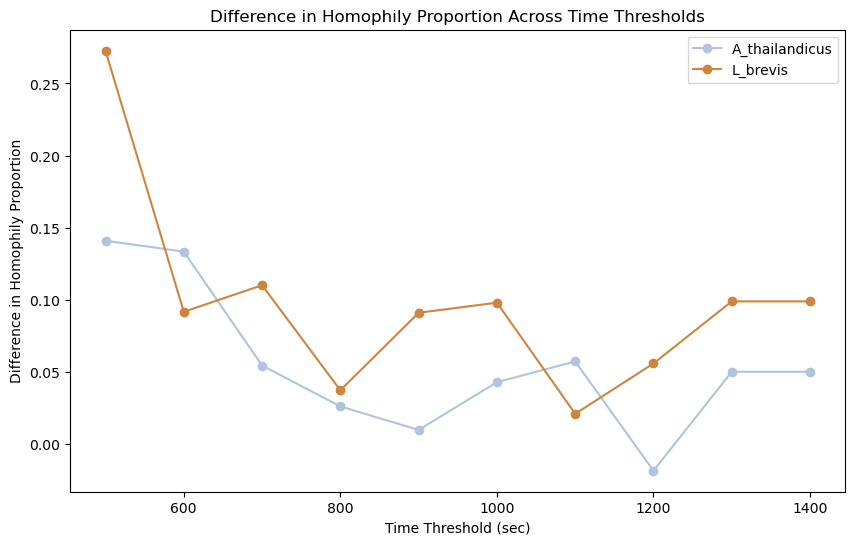

In [317]:
# Time thresholds to examine
time_thresholds = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]

# Initialize an empty list to store differences in proportions for each threshold
differences = []

# Loop over each time threshold
for threshold in time_thresholds:
    # Filter dataset based on 'Female' group and time threshold, and calculate proportions
    for female_group in ['A_thailandicus', 'L_brevis']:
        group_df = df[df['Female'] == female_group]
        
        early_proportion = group_df[group_df['Time to Mate (sec)'] <= threshold]['Homophily'].mean()
        late_proportion = group_df[group_df['Time to Mate (sec)'] > threshold]['Homophily'].mean()
        
        # Calculate the difference in proportions for the current female group at the current threshold
        difference = late_proportion - early_proportion
        differences.append({'Female Group': female_group, 'Threshold': threshold, 'Difference': difference})

# Convert the differences into a DataFrame
differences_df = pd.DataFrame(differences)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each Female group
colors = {'A_thailandicus': 'lightsteelblue', 'L_brevis': 'peru'}

for female_group in ['A_thailandicus', 'L_brevis']:
    group_data = differences_df[differences_df['Female Group'] == female_group]
    ax.plot(group_data['Threshold'], group_data['Difference'], label=female_group, color=colors[female_group], marker='o')

ax.set_xlabel('Time Threshold (sec)')
ax.set_ylabel('Difference in Homophily Proportion')
ax.set_title('Difference in Homophily Proportion Across Time Thresholds')
ax.legend()

plt.show()

In [324]:
   for female_group in ['A_thailandicus', 'L_brevis']:
        group_df = df[df['Female'] == female_group]
        
        early_proportion = group_df[group_df['Time to Mate (sec)'] <= threshold]['Homophily'].mean()
        late_proportion = group_df[group_df['Time to Mate (sec)'] > threshold]['Homophily'].mean()
        
lateMaterDf = df[df['Female'] == 'A_thailandicus']       
acetoLateMaterHomophily = lateMaterDf[lateMaterDf['Time to Mate (sec)'] > 600]['Homophily'].mean()
acetoLateCount = len(lateMaterDf[lateMaterDf['Time to Mate (sec)'] > 600]['Homophily'])
print(acetoLateMaterHomophily)
print(acetoLateCount)

lateMaterDf = df[df['Female'] == 'L_brevis']       
lactoLateMaterHomophily = lateMaterDf[lateMaterDf['Time to Mate (sec)'] > 600]['Homophily'].mean()
lactoLateCount = len(lateMaterDf[lateMaterDf['Time to Mate (sec)'] > 600]['Homophily'])
print(lactoLateMaterHomophily)
print(lactoLateCount)



#acetobacter late maters
acelatebinom = binomtest(21, acetoLateCount, p = 0.5,
           alternative = "greater")
#lac late maters
laclatebinom = binomtest(26, lactoLateCount, p = 0.5,
           alternative = "greater")

print(acelatebinom)
print(laclatebinom)



0.6
35
0.7027027027027027
37
BinomTestResult(k=21, n=35, alternative='greater', statistic=0.6, pvalue=0.15525232953950768)
BinomTestResult(k=26, n=37, alternative='greater', statistic=0.7027027027027027, pvalue=0.010036925959866494)
